# NumPy, matplotlib and the van der Waals Equation of State isotherms.
This notebook intends to present van der Waals's Equation of State([wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation),[nobel prize lecture](http://www.nobelprize.org/nobel_prizes/physics/laureates/1910/waals-lecture.pdf)) and its isotherms in the Pressure-Volume diagram.

> **Here you will meet the following topics:**
>- Thermodynamics: `EoS isotherms`.
>- Python: `matplotlib.pyplot`, `numpy`.
>- Jupyter Notebook: `magic command`, `interactive plotting`.


Supose you have to solve the following assignment in a thermodynamics course:
>"Plot the isotherm of van de Waals - EoS for some pure component at different values of T and comment on the sub-critical and super-critical behavior."

Here we will use some resources of the packages numpy and matplotlib. numpy is "the fundamental package for scientific computing with Python".
To import a module into our notebook we use the following syntax:

In [1]:
import numpy as np #this line imports the module numpy "the fundamental package for scientific computing with Python"
#import <-- keyword import
       #numpy <-- name of the package
             #as <-- the keyword "as" i sused to introduce an alias
                #np <-- the alias name that we wish to use to refer to that module

In order to use any function of this module, we have to write `alias_name.function_name`. As an example, we will see function `np.linspace` that will be used in the following cells.

We will also use matplotlib, a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
We will be particularly interested in the pyplot interface.

In [2]:
import matplotlib.pyplot as plt #this line imports the module pyplot from the package matplotlib
#import <-- keyword import
       #matplotlib <-- name of the whole package
                 #. <-- this dot designates posession: pyplot belongs to matplotlib
                  #pyplot <-- name of the module in matplotlib
                         #as <-- the keyword "as" i sused to introduce an alias
                            #plt <-- the alias name that we wish to use to refer to that module

From matplotlib, we will be most interested in the pyplot submodule. We will use its functions and, in order to do that, syntax will follow the same structure mentioned above: `alias_name.submodule_name.function_name`

In [3]:
%matplotlib inline
#this is an Ipython "magic command". This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib;
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

#you can try commenting the previous magic command and enabling the following
#%matplotlib notebook
#this command allows interactive figures, if your environment is suitable for it.

Consider the *van der Waals* equation of state (Reid et al., 1987 - see Eq 3-6.1 and Table 3-5, line 1)

$P=\frac{RT}{{\bar{V}}-b}-\frac{a}{{\bar{V}}^2}$

$a=\frac{27}{64}\frac{{{Tc}^2}{R^2}}{Pc}$


$b=\frac{{R}{Tc}}{{8}{Pc}}$

where $R$ is the gas constant: 

$R = 8.3144598 \mathrm{{J} {mol^{−1}} {K^{−1}}}$

Here, we will use hexane as an example. Its critical properties are: 

$Tc = 507.5 \mathrm{K}$


$Pc = 30.1 \times {10^5} \mathrm{Pa}$

So let's code this information:

First, we assign the value of the universal gas constant ($R$) to the variable named `R`

In [4]:
#gas constant
R = 8.3144598 #J.mol^−1.K^−1

Now, we assign the values of the critical properties of hexane ($Tc$ and $Pc$) to variables `Tc` and `Pc`.

In [5]:
#pure component critical point of hexane
# Tc (K)
Tc = 507.5 #K

# Pc (Pa)
Pc = 30.1*(10**5) #Pa

Finally, we create variables `a` and `b` for the EoS parameters $a$ and $b$.

In [6]:
a = 27/64*((Tc**2)*(R**2)/Pc)
print(a)

2.4954993637433445


In [7]:
b = (R*Tc)/(8*Pc)
print(b)

0.0001752320742732558


Once the values of the parameters were assigned, we can create a function for pressure calculation using the pressure-explicit form of the van der Waals EoS. Its variables are molar volume ($\bar{V}$) and temperature ($T$). These last two physical values (molar volume and temperature) will be represented by the variables `Vm` and `T`, respectively. 

In [8]:
def Pressure_van_Der_waals(T,Vm):
#define function to calc Pressure from T and V
    P = R*T/(Vm-b) - a/(Vm**2)
#note that T and Vm used inside the function are the dummy arguments, i.e., the values used in the calculation are the values provided when calling the function.
#a and b, on the other hand, are assumed known from the 'namespace' that encompasses that function, in this case, that is the namespace of the python code cells in the whole jupyter notebook being run  
#its functioning is quite simple here. however, it requires further comprehension when dealing with different python files and importing different modules.
    return P

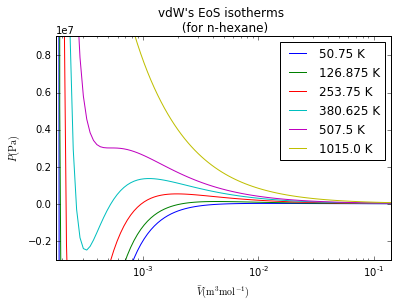

In [9]:
fig = plt.figure(1) #activate a figure

for T in np.array([.1,.25,.5,.75,1,2])*Tc:
#--------numpy.linspace <-- remember in course 1 we used the function "range" from python. that function works only for integers.
#here we want to make a range of real values. for that, we have to use the functions numpy.arange or numpy.linspace
#numpy.linspace works in the following way: we provide a initial value, and end value and the number of values, and it returns us a list with the desired number of values equally spaced in the desired interval
    
    #array of values for volume
    Vmi = np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)
    #here we use numpy.log the logarithm function and the linspace function to create a list that is equally spaced in the logarithm scale
    #and the numpy.exp,  the numpy exponencial to recover the values displayed in the original scale
    #this transformation to logarithm scale is convenient, given that the values obtained from the equation of state encompass several orders of magnitude.

    plt.semilogx(Vmi,Pressure_van_Der_waals(T,Vmi),label=str(T)+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
    plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
    plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label

    plt.title('vdW\'s EoS isotherms \n (for n-hexane)') #create a title for the figure
    plt.ylim(-Pc,Pc*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
    plt.xlim(b,(R*Tc/Pc)*100) #define max and min limits of the x axis

    plt.tick_params( # choose some formatting to the ticks
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.legend()    
    
plt.show() #finally show the plot. It shows in the output section of the cell if the magic command %matplotlib inline was used in the beginning of the notebook


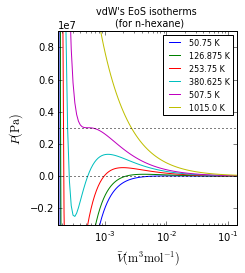

In [19]:
#bonus: some drafts for saving the fig in publication quality format

from matplotlib import rcParams as rc

fig_width = 9 / 2.54 #in inches
fig_height = 9 / 2.54 #in inches
fig_size =  [fig_width,fig_height]

#FONTS & TICKS\n",
params = {'backend': 'ps',
'axes.labelsize': 12,  #in pts
'font.size': 8, #in pts
'legend.fontsize': 8, #in pts
'xtick.labelsize': 10, #in pts
'ytick.labelsize': 10, #in pts
'text.usetex': False,
'figure.figsize': fig_size}
rc.update(params)


fig, ax = plt.subplots(1,1) #activate a figure

for T in np.array([.1,.25,.5,.75,1,2])*Tc:
#--------numpy.linspace <-- remember in course 1 we used the function "range" from python. that function works only for integers.
#here we want to make a range of real values. for that, we have to use the functions numpy.arange or numpy.linspace
#numpy.linspace works in the following way: we provide a initial value, and end value and the number of values, and it returns us a list with the desired number of values equally spaced in the desired interval
    
    #array of values for volume
    Vmi = np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)
    #here we use numpy.log the logarithm function and the linspace function to create a list that is equally spaced in the logarithm scale
    #and the numpy.exp,  the numpy exponencial to recover the values displayed in the original scale
    #this transformation to logarithm scale is convenient, given that the values obtained from the equation of state encompass several orders of magnitude.

    plt.semilogx(Vmi,Pressure_van_Der_waals(T,Vmi),label=str(T)+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
    plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
    plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label

    plt.title('vdW\'s EoS isotherms \n (for n-hexane)') #create a title for the figure
    plt.ylim(-Pc,Pc*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
    plt.xlim(b,(R*Tc/Pc)*100) #define max and min limits of the x axis

    plt.tick_params( # choose some formatting to the ticks
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.legend()    

fig.subplots_adjust(left=0.20, right=0.9, top=0.9, bottom=0.14)

plt.semilogx([b,100*R*Tc/Pc],[0,0],ls=':',color='k')

plt.semilogx([b,100*R*Tc/Pc],[Pc,Pc],ls=':',color='k')

ax.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))

fig.savefig('fig1.png', dpi=1000)
        
plt.show() #finally show the plot. It shows in the output section of the cell if the magic command %matplotlib inline was used in the beginning of the notebook

## Conclusion
In this notebook, it was demonstrated how to calculate the equilibrium pressure for a pure component as a function of its molar volume and temperature using a cubic equation of state. Isotherms were plotted in a PxV graphic using matplotlib library. After finishing this reading, you should be able to make simple uses of equations of state and create figures using tools from matplotlib, like pyplot. This will be an extremely needed skill in the following steps of this course, provided that we will create several graphic relating different thermodynamic properties. 

## External references:
### On python
* Convention for aliases (np, plt, ...): [SciPy / Tutorial](https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/general.html)
* Numpy tutorial: [scipy / numpy quickstart](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* Matplotlib usage: [Matplotlib / usage](matplotlib.org/faq/usage_faq.html)
* PyPlot tutorial: [tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* ipython magic command: [ipython / interactive plotting](http://ipython.readthedocs.io/en/stable/interactive/plotting.html)
* On the difference between "package" and "module": [stackoverflow / "what's the difference between a python module and a python package"?](http://stackoverflow.com/questions/7948494/whats-the-difference-between-a-python-module-and-a-python-package)

### On thermodynamics
* Reid, R. C.; Prausnitz, J. M.; Poling, B. E., The properties of gases and liquids, 4th Ed.; McGraw-Hill, 1987.

## Credits
* Initially developed in python 2.7 by Guilherme Carneiro Queiroz da Silva.
* Adapted to ipynb with python 3.5 by Iuri Soter Viana Segtovich.
* Review - Fernando de Azevedo Medeiros